<a href="https://colab.research.google.com/github/mdaugherity/MachineLearning2026/blob/main/class/DIY_1D_Classifier_SOLUTIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DIY 1D Classifier
In this assignment you will use **brutal force** to find a single decision boundary threshold for a one feature classifier.  You'll find some metrics to help calculate the optimal place, and try to convince me that it actually works.




In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

# Problems


We will soon be using a library that has functions like:
* `fit(X,y)` to train the classifier
* `predict(X)` to classify new points

I want to make sure you understand what's going on under the hood when we use scikit-learn, so we will start making our own simple version from scratch.

Our classifier is just going to be an if statement with a threshold $\theta$ where **any sample with $X<\theta$ is classified as species 0**, otherwise it is species 1.   

# Problem 1 - Predict
Part a) Write a **predict** function as described above that takes a **1D array** X of features and a threshold as input. The features are almost always in a 2D array, so we'll call this X1D to emphasize it's one-dimensionalness. It must output the predicted species in an array y_pred with a 0 or 1 for each sample in X,

Part b) Never forget DrD's Golden Rule of Computing:

**ALWAYS TEST YOUR CODE IN CASES WHERE YOU KNOW THE RIGHT ANSWER**

Show that for a threshold between 4 and 5 your function correctly predicts X_test to get y_test  





In [2]:
def predict(X1D, thresh):
  """ Predicts each sample as 0 when X<thresh """
  y_pred = np.where(X1D<thresh, 0,1)
  return y_pred


In [3]:
def predictStudentFriendly(X, thresh):
  """ Instead of my sinlge-line trick, here's how students may do it """
  y_pred = np.zeros_like(X)
  for i,xval in enumerate(X):
    if xval<thresh:
      y_pred[i]=0
    else:
      y_pred[i]=1

  return y_pred

In [4]:
X_test = np.arange(10)
y_test = np.hstack((np.zeros(5,dtype=int), np.ones(5,dtype=int)))
print(X_test)
print(y_test)

[0 1 2 3 4 5 6 7 8 9]
[0 0 0 0 0 1 1 1 1 1]


In [5]:
y_pred = predict(X_test, 4.5)
print('My answer:\t',y_pred)
print('Right answer:\t',y_test)

My answer:	 [0 0 0 0 0 1 1 1 1 1]
Right answer:	 [0 0 0 0 0 1 1 1 1 1]


# Problem 2 - Score
Write a function called score that given output from predict and the right answers returns the percentage of predictions that were correct.



Again, show me tests of your function getting the right answer


In [6]:
def score(y_pred, y):
  """ Return percentage of rows where y_pred matches y """
  score = (y_pred==y).sum() / len(y_pred)  # fix this line and fill in missing steps

  return score

In [7]:
def scoreStudentFriendly(y_pred, y):
  """ Version without showing off """
  score = 0
  for i in range(len(y_pred)):
    if y_pred[i]==y[i]:
      score +=1
  score /= len(y_pred)
  return score

In [8]:
score(y_pred, y_test)

np.float64(1.0)

# Problem 3 - Fit
One final function will have to determine which threshold gives the best score.  Try lots and lots of different thresholds (using something like linspace) with your score function and returns the best one.







In [9]:
def fit(X1D,y):
  """ Find a threshold that returns the best score """
  THRESHES = np.linspace(X1D.min(), X1D.max(), 100)
  best_thresh = 0
  best_score = 0
  for t in THRESHES:
    y_pred = predict(X1D, t)
    s = score(y_pred, y)
    if s>best_score:
      best_thresh = t
      best_score = s

  return best_thresh

In [10]:
fit(X_test, y_test)

np.float64(4.090909090909091)

# Problem 4 - Iris Classifier

Use your functions to make a single-feature iris classifier using data from Tutorial 4.  Use it on X0 defined below. Make a plot to prove your answer is right.

In [11]:
data_bunch = datasets.load_iris()
Xall, yall = datasets.load_iris(return_X_y=True)

In [12]:
X = Xall[yall<2]  # get rid of species 2
y = yall[yall<2]

print('Feature data shape: ',X.shape)
print('Feature Names:\t', data_bunch.feature_names)
print('Target Names:\t', data_bunch.target_names)

Feature data shape:  (100, 4)
Feature Names:	 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names:	 ['setosa' 'versicolor' 'virginica']


In [13]:
# Define some 1D data
X0 = X[:,0]

In [14]:
print(X0)

[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7]


In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

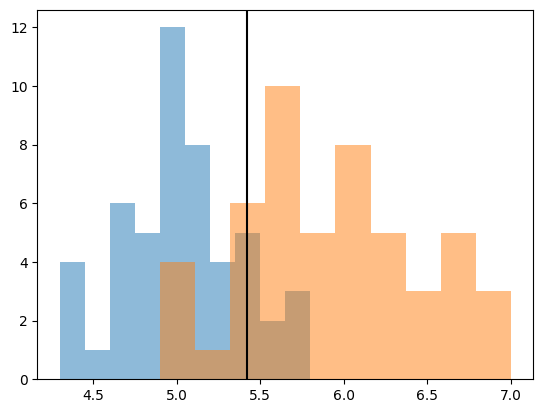

Best threshold is:  5.418181818181818
Best score is:  0.89


In [16]:
thresh = fit(X0, y)
plt.hist( X0[y==0], alpha=0.5)
plt.hist( X0[y==1], alpha=0.5)
plt.axvline(thresh, color='k')
plt.show()
print('Best threshold is: ', thresh)
y_pred = predict(X0, thresh)
print('Best score is: ', score(y_pred, y))


There are many different ways of visualizing this.  Here's a few options:

In [17]:
def makeplots(X,y):
  plt.figure(figsize=(12,5))
  thresh = fit(X,y)

  NUM = 3

  plt.subplot(1,NUM,1)
  thresholds = np.linspace(X.min(), X.max(),num=100)
  A = np.zeros_like(thresholds)
  for i,t in enumerate(thresholds):
    y_pred = predict(X,t)
    A[i] = score(y_pred, y)
  print('Best threshold:\t', A.max())
  print('Best score:    \t', thresholds[A.argmax()])

  plt.plot(thresholds, A)
  #plt.axvline(t,color='red', ls=':')
  plt.axvline(thresh,color='black')
  plt.xlabel('Threshold')
  plt.ylabel('Accuracy')
  plt.ylim(0,1.1)
  plt.title(f"Option 1")
  plt.grid()

  plt.subplot(1,NUM,2)
  plt.hist(X[y==0],alpha=0.5)
  plt.hist(X[y==1],alpha=0.5)
  plt.axvline(thresh,color='black')
  plt.xlabel('Threshold')
  #plt.ylabel('Accuracy')
  plt.title(f"Option 2")

  plt.subplot(1,NUM,3)
  plt.scatter(x=X, y=y+0.02*np.random.standard_normal(len(X)), c=y, cmap='bwr', alpha=0.2)
  plt.axvline(thresh, color='black')
  plt.xlabel('Threshold')
  #plt.ylabel('Accuracy')
  plt.title(f"Option 3")

  plt.tight_layout()
  plt.show()

Best threshold:	 0.89
Best score:    	 5.418181818181818


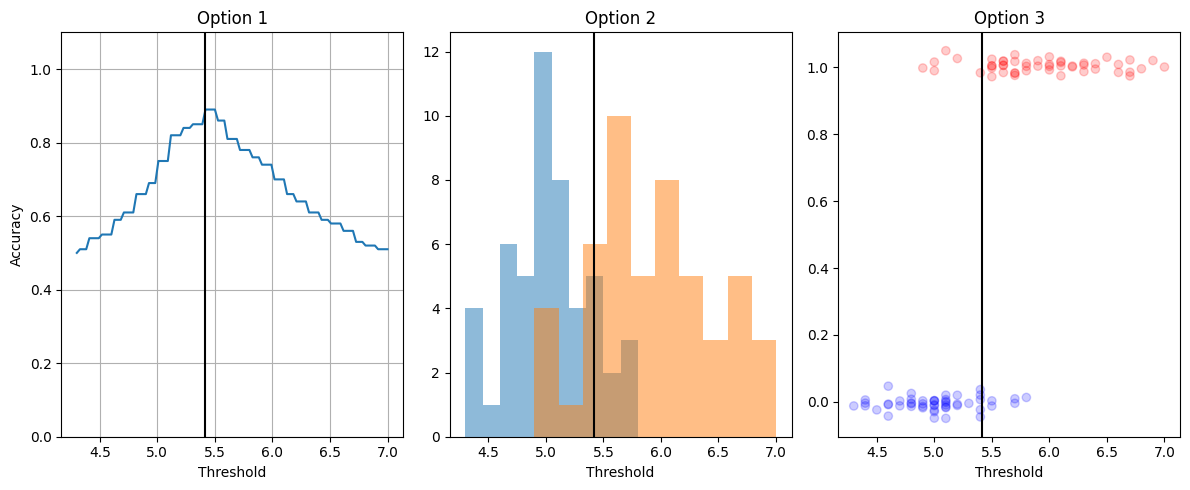

In [18]:
makeplots(X0,y)

# Problem 5 - Mysteries
Just for fun, also run your classifier and make plots for the two test cases made up below.  Convince me that it works.

In [19]:
N1 = 20
np.random.seed(3)
Xtest1 = np.hstack((np.random.rand(N1)+2, np.random.rand(N1)*1.1+2.2))
ytest1 = np.hstack((np.zeros(N1),np.ones(N1)))

Best threshold:	 0.725
Best score:    	 2.591987828896739


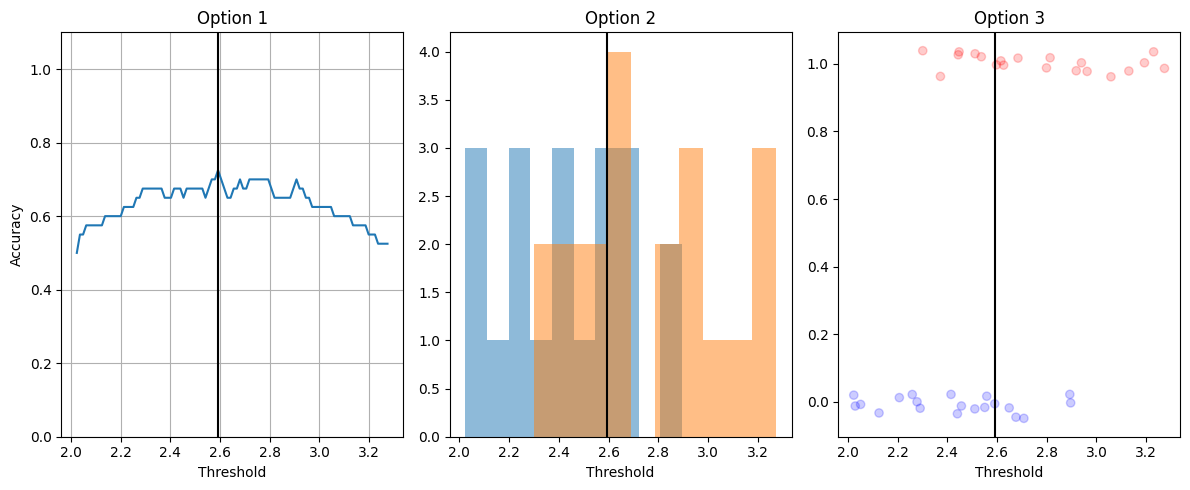

In [20]:
makeplots(Xtest1, ytest1)

In [21]:
N2 = 50
np.random.seed(3)
Xtest2 = np.random.randn(N2*2)
ytest2 = np.hstack((np.zeros(N2),np.ones(N2)))

Best threshold:	 0.64
Best score:    	 0.10809395060252269


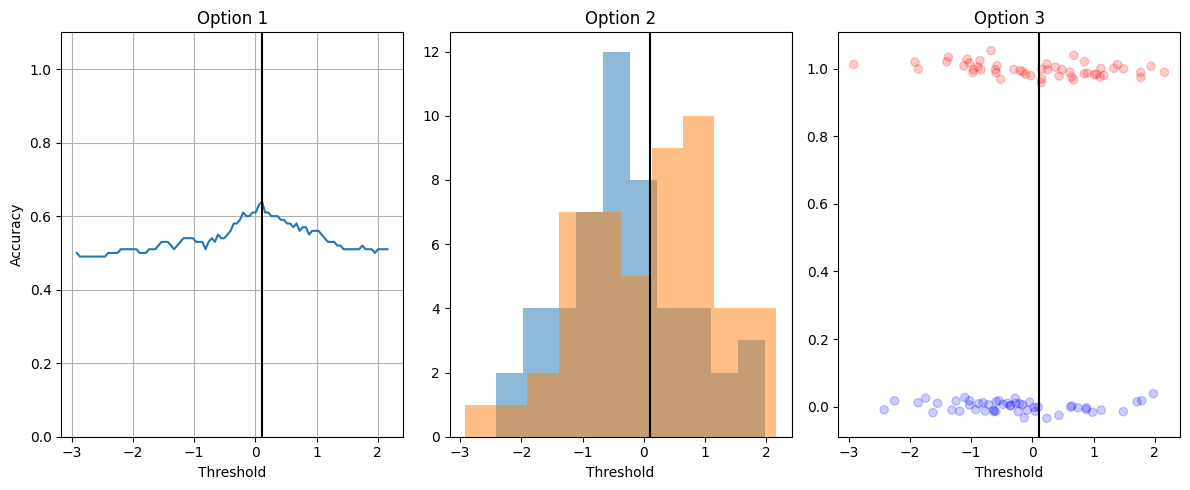

In [22]:
makeplots(Xtest2, ytest2)